# Module 03

## Session 07 Imbalance Classification

Analyze data bankloan.csv

* build a logistics regression model
    - target: default
    - features: employ, debtinc, creddebt, othdebt
* explore class distribution
* random state 2020, stratified training 60%, validation 20%, testing 20%
* modelling evaluate by f1 score:
    - logistic regression without any treatment
    - logistic regression that optimized by the treshold
    - logistic regression with random undersampling
    - penalized logistic regression

# Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
bankloan = pd.read_csv('./datasets/bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [3]:
bankloan['default'].value_counts()/bankloan.shape[0]

0    0.738571
1    0.261429
Name: default, dtype: float64

# Data Splitting

- 60% Train
- 20% validation
- 20% test

In [4]:
X = bankloan[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = bankloan['default']

In [5]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=140,
    random_state=2020
)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    stratify=y_trainval,
    test_size=140,
    random_state=2020
)

# Model

## 1. Logistic Regression

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       104
           1       0.67      0.50      0.57        36

    accuracy                           0.81       140
   macro avg       0.75      0.71      0.72       140
weighted avg       0.80      0.81      0.80       140



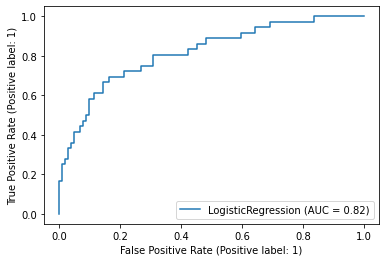

In [9]:
plot_roc_curve(model, X_val, y_val)

## 2. Logistic Regression Optimized Treshold

In [11]:
th_value = [i/100 for i in range(20,61)]
score = 0
score_list = []

for i in th_value:
    # score calc
    y_prob = model.predict_proba(X_val)[:,1]
    y_pred = np.where(y_prob > i, 1, 0)
    score_temp = f1_score(y_val, y_pred)

    # store score
    score_list.append(score_temp)

    # score comparison
    if score_temp > score:
        score = score_temp
        best_th = i

In [13]:
print('best f1 score', score)
print('best th', best_th)

best f1 score 0.64
best th 0.4


Text(0, 0.5, 'f1 score')

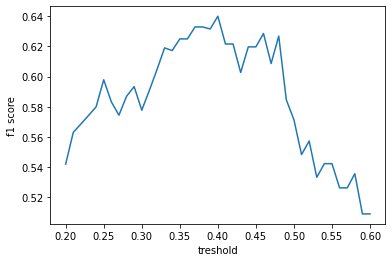

In [14]:
sns.lineplot(th_value, score_list)
plt.xlabel('treshold')
plt.ylabel('f1 score')

## 3. Logistic Regression with Random UnderSampling

In [15]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train, y_train)

In [16]:
len(y_under)

220

In [17]:
len(y_train)

420

In [20]:
model_rus = LogisticRegression()
model_rus.fit(X_under, y_under)

LogisticRegression()

In [21]:
y_pred = model_rus.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       104
           1       0.47      0.75      0.57        36

    accuracy                           0.71       140
   macro avg       0.68      0.73      0.68       140
weighted avg       0.78      0.71      0.73       140



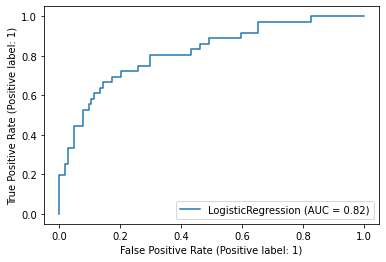

In [22]:
plot_roc_curve(model_rus, X_val, y_val)

## 4. Penalized Logistic Regression

In [23]:
model_balanced = LogisticRegression(class_weight='balanced')
model_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [24]:
y_pred = model_balanced.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       104
           1       0.48      0.81      0.60        36

    accuracy                           0.72       140
   macro avg       0.69      0.75      0.69       140
weighted avg       0.80      0.72      0.74       140



## Performance Final Model: Logistic Optimized Treshold

In [25]:
model = LogisticRegression()
model.fit(X_trainval, y_trainval)

LogisticRegression()

In [26]:
y_prob = model.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > best_th, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.54      0.54      0.54        37

    accuracy                           0.76       140
   macro avg       0.69      0.69      0.69       140
weighted avg       0.76      0.76      0.76       140

